<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-colabs/blob/main/Testes_de_Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base de dados

In [ ]:
#importação dos dados a partir de um documento compartilhado via google drive
#fonte de dados: https://archive.ics.uci.edu/ml/datasets/student+performance
import pandas as pd
url='https://drive.google.com/file/d/15d-wDAC5aaoEbLbROe1mYs3EfYReeLsI/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,sep=';')

In [ ]:
#visualiza os tipos de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#Testes de Hipóteses

##Teste T de Student

Comparação das médias de notas entre homens e mulheres <br>
H0: As médias entre homens e mulheres são iguais <br>
H1: As médias entre homens e mulheres são diferentes

In [ ]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

In [ ]:
df.groupby('sex').G3.mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

In [ ]:
mulheres = df[df['sex'] =='F'].G3
homens = df[df['sex'] =='M'].G3

In [ ]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(mulheres, homens)
print(f'T-statistic: {stat}')
print(f'P-value: {p}')

T-statistic: -2.061992815503971
P-value: 0.039865332341527636


Rejeita a hipótese nula. Há diferença entre as médias de notas entre homens e mulheres.

##Teste Anova a um fator


Comparação entre as médias de notas e o tempo de estudo semanal<br>
H0: As médias entre os grupos são iguais<bR>
H1: As médias entre os grupos são diferentes

In [ ]:
#weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
df.studytime.value_counts()

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

In [ ]:
df['G3'].groupby(df['studytime']).describe()

,count,mean,std,min,25%,50%,75%,max
studytime,,,,,,,,
1,105.0,10.047619,4.956311,0.0,8.0,10.0,13.0,19.0
2,198.0,10.171717,4.217537,0.0,8.0,11.0,13.0,19.0
3,65.0,11.400000,4.639504,0.0,10.0,12.0,15.0,19.0
4,27.0,11.259259,5.281263,0.0,9.0,12.0,14.5,20.0


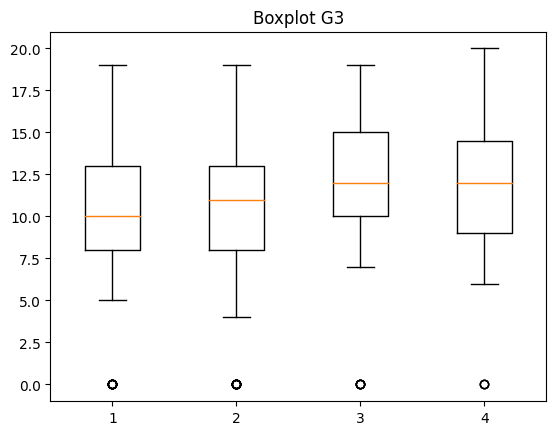

In [ ]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot G3')
ax1.boxplot([df[df['studytime']==1]['G3'], df[df['studytime']==2]['G3'], df[df['studytime']==3]['G3'], df[df['studytime']==4]['G3']])
plt.show()

In [ ]:
import scipy.stats as stats
stats.f_oneway(df['G3'][df['studytime'] == 1],
             df['G3'][df['studytime'] == 2],
             df['G3'][df['studytime'] == 3],
               df['G3'][df['studytime'] == 4])

F_onewayResult(statistic=1.7278351054436039, pvalue=0.1607228096836598)

Como o p-valor é maior que 5% aceita-se a hipótese nula: as médias entre os grupos são iguais, ou, as médias obtidas pelas diferentes cargas horárias de estudo são estatisticamente iguais.

##Teste Anova a dois fatores

Comparação entre as médias de notas e a escolaridade paterna e materna<br>
H0: As médias entre os grupos da escolaridade materna são iguais<bR>
H1: As médias entre os grupos da escolaridade materna são diferentes

H0: As médias entre os grupos da escolaridade paterna são iguais<bR>
H1: As médias entre os grupos da escolaridade paterna são diferentes

H0: Não há interação entre as escolaridades materna e paterna<bR>
H1: Há interação entre as variáveis

In [ ]:
#Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
#Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
df.Medu.value_counts()

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64

In [ ]:
df.Fedu.value_counts()

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64

In [ ]:
df.groupby(['Medu','Fedu'])['G3'].describe()

count       mean       std   min    25%   50%    75%   max
Medu Fedu                                                            
0    1       1.0   9.000000       NaN   9.0   9.00   9.0   9.00   9.0
     2       2.0  15.000000  0.000000  15.0  15.00  15.0  15.00  15.0
1    0       1.0  16.000000       NaN  16.0  16.00  16.0  16.00  16.0
     1      37.0   8.297297  4.267870   0.0   7.00  10.0  11.00  16.0
     2      15.0   9.333333  4.514527   0.0   8.50  11.0  12.00  15.0
     3       5.0   7.200000  4.147288   0.0   8.00   8.0  10.00  10.0
     4       1.0  13.000000       NaN  13.0  13.00  13.0  13.00  13.0
2    1      28.0   9.214286  5.057866   0.0   7.75  10.0  12.25  18.0
     2      51.0   9.333333  4.752543   0.0   8.00  11.0  12.00  19.0
     3      17.0  10.529412  3.776865   0.0  10.00  11.0  13.00  17.0
     4       7.0  12.714286  3.039424   8.0  11.00  13.0  14.50  17.0
3    1      15.0  11.266667  4.182731   6.0   7.50  10.0  15.00  18.0
     2      28.0  10.321429  5.121151   0.0   7.75  10.5  14.00  19.0
     3      38.0  10.236842  3.642350   0.0   9.00  10.0  12.00  18.0
     4      18.0   9.611111  6.079269   0.0   6.00  11.0  14.50  18.0
4    0       1.0  10.000000       NaN  10.0  10.00  10.0  10.00  10.0
     1       1.0   8.000000       NaN   8.0   8.00   8.0   8.00   8.0
     2      19.0  12.894737  3.314861   5.0  10.00  14.0  15.00  19.0
     3      40.0  11.550000  4.579497   0.0   9.00  11.0  15.00  20.0
     4      70.0  11.657143  4.353528   0.0  10.00  12.0  14.00  19.0

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('G3 ~ Medu + Fedu + Medu:Fedu', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Medu,201.677192,1.0,10.019884,0.001670
Fedu,3.944359,1.0,0.195967,0.658241
Medu:Fedu,6.083488,1.0,0.302245,0.582793
Residual,7869.929712,391.0,NaN,NaN


Medu = p-valor < 5%, rejeita a hipótese nula, Há diferença entre as médias entre os grupos de nível de escolaridade paterna <br>
Fedu = p-valor > 5%, aceita a hipótese nula, Não há diferença entre as médias entre os grupos de nível de escolaridade materna <br>
Medu:Fedu = p-valor > 5%, aceita a hipótese nula, Não há interação entre os nível de escolaridade paternos e maternos

##Teste Qui-Quadrado


Comparação das proporções do tamanho da família em relação ao local de moradia<br>
H0: As proporções entre os grupos são iguais<bR>
H1: As proporções entre os grupos são diferentes

In [ ]:
#famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
df.famsize.value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [ ]:
#address - student's home address type (binary: 'U' - urban or 'R' - rural)
df.address.value_counts()

U    307
R     88
Name: address, dtype: int64

In [ ]:
#criar a tabela de contingencia
var1 = 'famsize'
var2 = 'address'

# Criar tabela de contingência
chi = pd.crosstab(df[var1], df[var2])
chi

address,R,U
famsize,,
GT3,68,213
LE3,20,94


In [ ]:
import scipy.stats as stats
chi_scores = stats.chi2_contingency(chi)
chi_scores

Chi2ContingencyResult(statistic=1.7080569422911414, pvalue=0.19123766649306323, dof=1, expected_freq=array([[ 62.60253165, 218.39746835],
       [ 25.39746835,  88.60253165]]))

O p-value > 5%, aceita a hipótese nula, não há associação entre as variáveis address e famsize, as variáveis são independentes.

##Correlação de Pearson


Avaliar se existe a correlação entre idade e a nota final.<br>
H0: A correlação entre as variáveis é igual a 0.<bR>
H1: A correlação entre as variáveis é diferente de 0.

In [ ]:
from scipy.stats import pearsonr
print(pearsonr(df['age'],df['G3']))

PearsonRResult(statistic=-0.16157943813834014, pvalue=0.0012714385457178157)


O p-valor rejeita a hipótese nula, < 5%, assim, há correlação entre as variáveis de idade e nota final.